# Aircraft to XFLR Demonstration 

This IPython notebook demonstrates how to use AC2XFLR to convert your aircraft geometry into an XML file which can be imported by XFLR5. This tool can produce a planform view of your wing to verify that your geometry has been correctly enterred.

First, import the python file.

In [1]:
from AC2XFLR import *

## Wing (Includes tail surfaces)

To produce a wing, several parameters can be defined. To generate a horizontal or vertical stabiliser, also use this class.


| Parameter       | Description                                                                                                                                                                                                                | Default |
|----------------:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------|
| foil            | The aerofoil name. This needs to be the same as it is defined in XFLR5. This must already be loaded under the same name in XFLR under File → Direct Foil Design. A NACA foil can be defined simply with Foil → Naca Foils. | "NACA 1212" |
| angle_of_attack | The angle of attack in degrees | 0.0 |
| span            | The wingspan in metres from tip to tip. This is not a wing semi-span. | 8.0 |
| root_chord      | The chord length in metres of the wing at spanwise position y = 0. | 1.0 |
| mass            | The mass of the wing in kilograms, which is used in XFLR5's stability calculations. | 50.0 |
| shape_args      | The shape arguments dictionary. This contains unique properties to the specific planform shape. Currently only elliptical profiles are supported. See the shape_args table below. | {"shape": "ellipse",
			"fsmf": 0.25} |
| _type           | The type of wing. Is it a "mainwing", a "horizontal stabiliser", or "vertical stabiliser"? | "mainwing" |
| symmetric_fin   | If this is a vertical stabiliser, is it symmetrical (reflected in the vertical (z) axis)?   | False |
| double_fin      | If this is a vertical stabiliser, is it to be doubled (reflected in the y axis)?            | False |
| draw            | Do you want to see a planform plot of the wing?                                             | False |

The `shape_args` is a dictionary with completely different keys depending on the type of shape used.

| Shape | Key | Description |
|:----|:-------|:-------|
| "ellipse" | "fsmf" | The forward semi-minor axis fraction. Defines the fraction of the ellipse bounded by the tips of the leading edge, see plot below |

### Example 1: Elliptical Main Wing

C:\Users\ejduc\Engineering\AC2XFLR\AC2XFLR.py:107: RuntimeWarning: invalid value encountered in sqrt
  c_fore = K_fore*(1-(2/self.span * y)**2)**0.5
C:\Users\ejduc\Engineering\AC2XFLR\AC2XFLR.py:112: RuntimeWarning: invalid value encountered in sqrt
  c_aft = K_aft*(1-(2/self.span * y)**2)**0.5


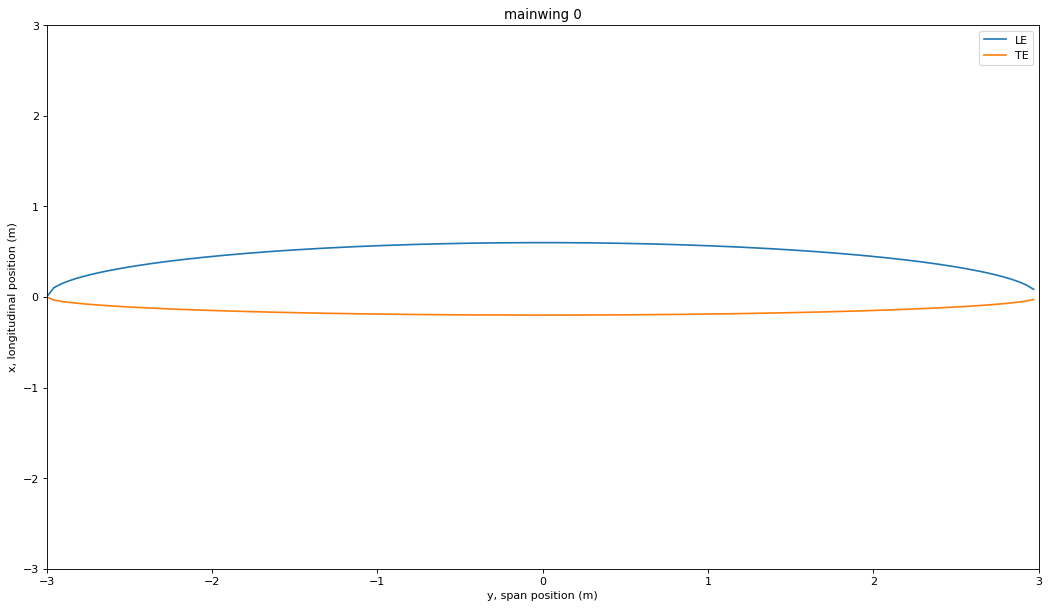

In [3]:
foil = "NACA 0012"
angle_of_attack = 15 #deg
span = 6 #m
root_chord = 0.8 #m
mass = 40 #kg
shape_args = {"shape":"ellipse", "fsmf": 0.75}
_type = "mainwing"
symmetric_fin = False
double_fin = False
draw = True
my_wing = Wing(foil, angle_of_attack, span, root_chord, mass, shape_args, _type, symmetric_fin, double_fin, draw)

If the geometry looks good, convert your wing to XML.

This XML file will be exported to the same folder as AC2XFLR.py

In [2]:
my_wing.wingToXML()

The wing by itself can be imported alone onto the aircraft in the "Define" context window.

<img src="docs_source/wing_import.png">

Once imported, the 3D wing should display. Remember, if it appears flat, the foil must be created in `File → Direct Foil Design`. The wing doesn't close with fine tips because this causes errors in Reynolds number and other calculations.

<img src="docs_source/elliptical_wing.png">